In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
diabetes_df = pd.read_csv("diabetic_data.csv")

In [3]:
diabetes_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetes_df.describe(include=['object'])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


There appear to be numerous missing values noted as '?' 

In [5]:
diabetes_df.shape

(101766, 50)

In [6]:
#diabetes_df['OUTPUT_LABEL'] = (diabetes_df.readmitted == '<30').astype('int')

In [7]:
#def calc_prevalence(y_actual):
    #return (sum(y_actual)/len(y_actual))

In [8]:
#print('Prevalence:%.3f'%calc_prevalence(diabetes_df['OUTPUT_LABEL'].values))

In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [10]:
diabetes_df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

The data doesnt appear to have any NULL values, but does have numerous values noted as '?'

In [11]:
diabetes_df = diabetes_df.replace('?', np.nan)

In [12]:
df_raw = diabetes_df.sample(10000)
df_raw.shape

(10000, 50)

In [13]:
diabetes_df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Once I have replace the '?' strings to NULL values based on the columns this affects I would consider the NULL values to not affect my sample as race, weight, payer_code, medical_specialty are not vital to my study. Regarding diag_1, diag_2 and diag_3 they are not required fields due to the fact that not every patient is diagnoses with a formal diagnosis, as well as if the patient is diagnosed it does not necessarily mean that the patient would have more then 1 diagnosis.

In [14]:
patients_missing_records = diabetes_df.isnull().apply(sum, axis=1)
patients_missing_records.head()

0    4
1    3
2    3
3    3
4    3
dtype: int64

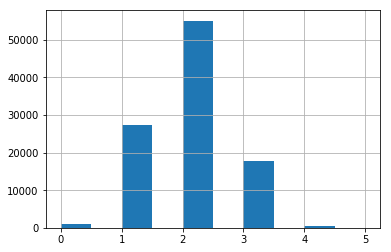

In [15]:
patients_missing_records.hist()

Created a visual representation of number of records out of the 50 possible columns that have NULL values. With patients having within 0 to 4 records out of 50 missing I would say thats pretty good, but am not sure if I should curate the data a bit more

In [16]:
diabetes_df = diabetes_df.drop(['payer_code','medical_specialty'], axis = 1)

In [17]:
diabetes_df.loc[diabetes_df.age== '[0-10)','age'] = 0;
diabetes_df.loc[diabetes_df.age== '[10-20)','age'] = 10;
diabetes_df.loc[diabetes_df.age== '[20-30)','age'] = 20;
diabetes_df.loc[diabetes_df.age== '[30-40)','age'] = 30;
diabetes_df.loc[diabetes_df.age== '[40-50)','age'] = 40;
diabetes_df.loc[diabetes_df.age== '[50-60)','age'] = 50;
diabetes_df.loc[diabetes_df.age== '[60-70)','age'] = 60;
diabetes_df.loc[diabetes_df.age== '[70-80)','age'] = 70;
diabetes_df.loc[diabetes_df.age== '[80-90)','age'] = 80;
diabetes_df.loc[diabetes_df.age== '[90-100)','age'] = 90;

To assist with analysis I have converted age object string ranges to integers

In [18]:
diabetes_df.loc[diabetes_df.weight== '[0-25)','weight'] = 0;
diabetes_df.loc[diabetes_df.weight== '[25-50)','weight'] = 25;
diabetes_df.loc[diabetes_df.weight== '[50-75)','weight'] = 50;
diabetes_df.loc[diabetes_df.weight== '[75-100)','weight'] = 75;
diabetes_df.loc[diabetes_df.weight== '[100-125)','weight'] = 100;
diabetes_df.loc[diabetes_df.weight== '[125-150)','weight'] = 125;
diabetes_df.loc[diabetes_df.weight== '[150-175)','weight'] = 150;
diabetes_df.loc[diabetes_df.weight== '[175-200)','weight'] = 175;
diabetes_df.loc[diabetes_df.weight== '>200','weight'] = 200;

To assist with analysis I have converted weight object string ranges to integers

In [19]:
diabetes_df.loc[diabetes_df.max_glu_serum== 'None','max_glu_serum'] = 0;
diabetes_df.loc[diabetes_df.max_glu_serum== 'Norm','max_glu_serum'] = 100;
diabetes_df.loc[diabetes_df.max_glu_serum== '>200','max_glu_serum'] = 200;
diabetes_df.loc[diabetes_df.max_glu_serum== '>300','max_glu_serum'] = 300;

To assist with analysis I have converted max glucose in serum objects into integers. Blood glucose levels are measure in mg/dl so the average 'Norm' or normal glucose in blood level is 100.

In [20]:
diabetes_df.loc[diabetes_df.A1Cresult== 'None','A1Cresult'] = 0;
diabetes_df.loc[diabetes_df.A1Cresult== 'Norm','A1Cresult'] = 5;
diabetes_df.loc[diabetes_df.A1Cresult== '>7','A1Cresult'] = 7;
diabetes_df.loc[diabetes_df.A1Cresult== '>8','A1Cresult'] = 8;

To assist with analysis I have converted the Hemoglobin A1C result objects into integers. The average 'Norm' or normal A1C results is 5.

In [21]:
diabetes_df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

Very relevent to my hypothesis is the information around patient readmission. With this particular data set it does not do a good job of providing the exact number of day result, but rather 'NO', '>30' and '<30'. Due to this I do believe I can accuratly predict the day length if readmitted, but rather only if the patient is likely to be readmitted.

In [22]:
diabetes_df.loc[diabetes_df.readmitted == 'NO','readmitted'] = 0;
diabetes_df.loc[diabetes_df.readmitted == '>30','readmitted'] = 1;
diabetes_df.loc[diabetes_df.readmitted == '<30','readmitted'] = 1;

In [23]:
diabetes_df['readmitted'].unique()

array([0, 1])

With my last comment in mind I have selected to convert any readmission record equal to 'NO' to be coverted in 0 and any other record whether '<30' or '>30' be translated as a 1

In [24]:
diabetes_df.groupby('A1Cresult').size()

A1Cresult
0    84748
5     4990
7     3812
8     8216
dtype: int64

Diistribution of results from A1Cresult column, as this would indicate if Hemoglobin A1C test was performed or not

In [25]:
primary_diagnosis_count = diabetes_df.diag_1.value_counts().sort_values(ascending=False)
primary_diagnosis_count.head(30).to_frame('Count of primary diagnosis code')

,Count of primary diagnosis code
428,6862
414,6581
786,4016
410,3614
486,3508
427,2766
491,2275
715,2151
682,2042
434,2028


It may be relevent in the future to identify the most common primary diagnosis..need to further investigate the ICD codes in question

In [26]:
diagnosis_counts = (diabetes_df.diag_1.value_counts() + diabetes_df.diag_2.value_counts() + diabetes_df.diag_3.value_counts()).sort_values(ascending=False)
diagnosis_counts.head(20).to_frame('Count of patients with diagnosis code')

,Count of patients with diagnosis code
428,18101.0
250,17861.0
276,13816.0
414,12895.0
401,12371.0
427,11757.0
599,6824.0
496,5990.0
403,5693.0
486,5455.0


The dataset is limited to just the top 3 diagnosis codes, but my play relevance is determining which are most common vs just the primary diagnosis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c6fa240>,
      dtype=object)

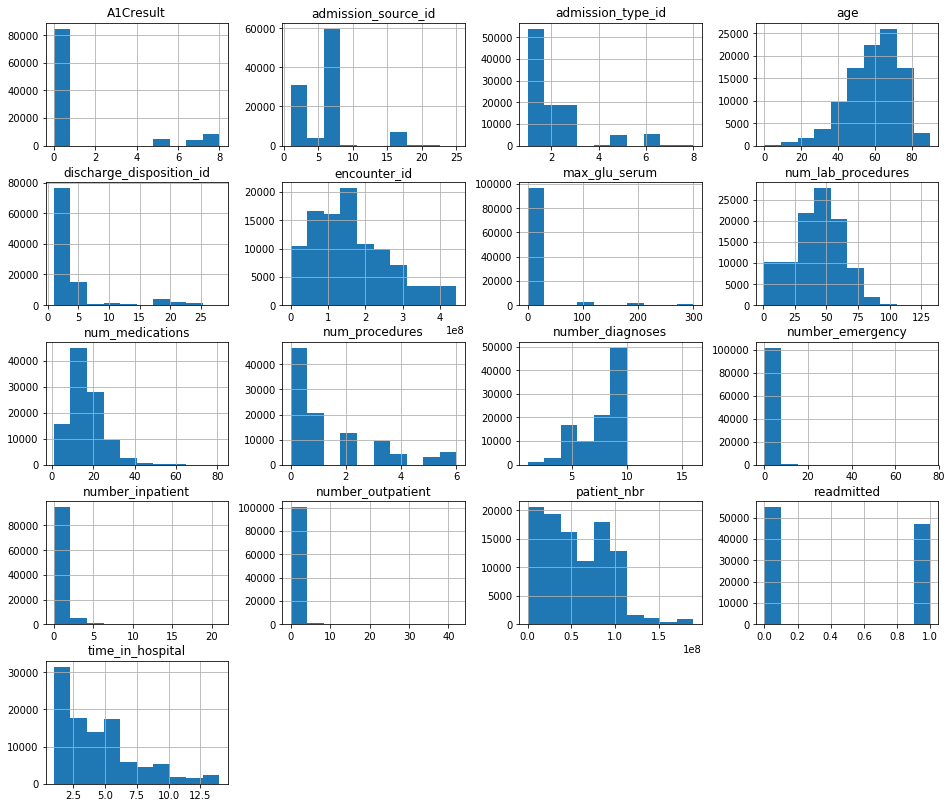

In [27]:
diabetes_df.hist(figsize=(16,14))

encounter_id                   AxesSubplot(0.125,0.749828;0.133621x0.130172)
patient_nbr                 AxesSubplot(0.285345,0.749828;0.133621x0.130172)
age                          AxesSubplot(0.44569,0.749828;0.133621x0.130172)
weight                      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
admission_type_id           AxesSubplot(0.766379,0.749828;0.133621x0.130172)
discharge_disposition_id       AxesSubplot(0.125,0.593621;0.133621x0.130172)
admission_source_id         AxesSubplot(0.285345,0.593621;0.133621x0.130172)
time_in_hospital             AxesSubplot(0.44569,0.593621;0.133621x0.130172)
num_lab_procedures          AxesSubplot(0.606034,0.593621;0.133621x0.130172)
num_procedures              AxesSubplot(0.766379,0.593621;0.133621x0.130172)
num_medications                AxesSubplot(0.125,0.437414;0.133621x0.130172)
number_outpatient           AxesSubplot(0.285345,0.437414;0.133621x0.130172)
number_emergency             AxesSubplot(0.44569,0.437414;0.133621x0.130172)

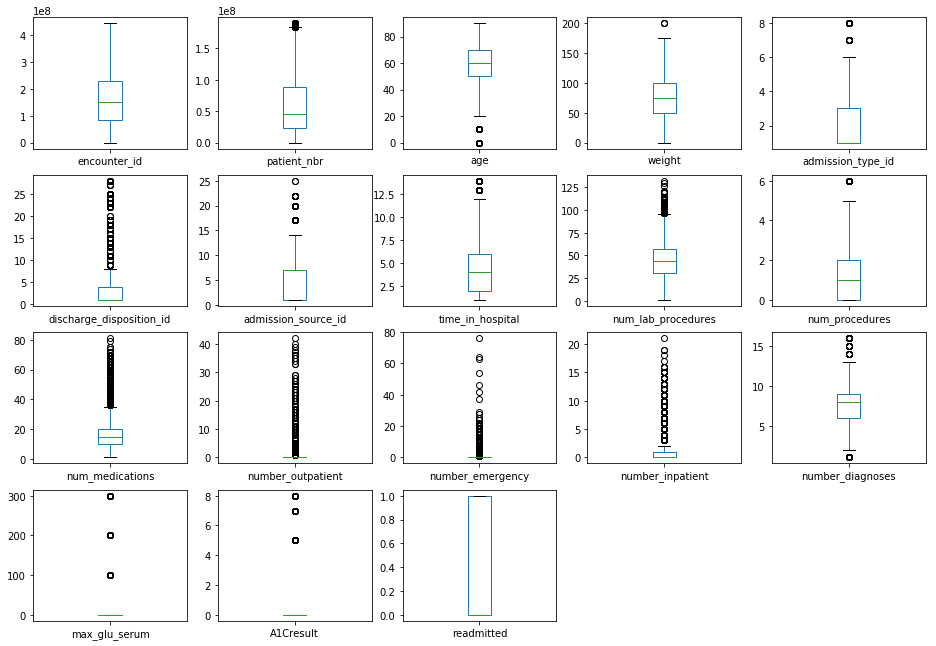

In [28]:
diabetes_df.plot(kind = 'box' , subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(16,14))

As I noted previously the only data I would consider to be problematic was the readmission data that I decided to manipulate into either the fact that patient was readmitted or not. I would have been interesting to attempt to predict a day value associate with readmission stay, if readmitted, but this way I will attempt to determine the probablity of readimission through various factors. 

In [29]:
A1Cresult_grouped = diabetes_df.groupby('A1Cresult').size()
A1Cresult_grouped

A1Cresult
0    84748
5     4990
7     3812
8     8216
dtype: int64

In [30]:
import seaborn as sns

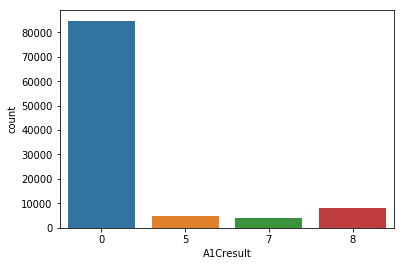

In [31]:
ax = sns.countplot(x = "A1Cresult", data = diabetes_df)

Due to the fact that all patients in this population have already being diagnosed with diabetes and the HBA1C test being a simple procedure to see how the patient is maintaining their diabeties you would expect that more then have the test performed. 101766...0=83.3%, 5=4.9%, 7=4.5%, 8=8.1%

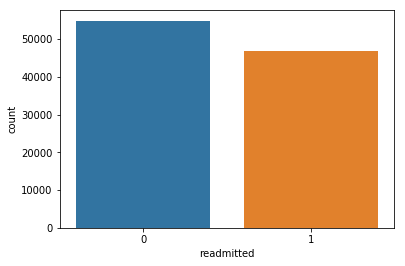

In [32]:
ax = sns.countplot(x = "readmitted", data = diabetes_df)

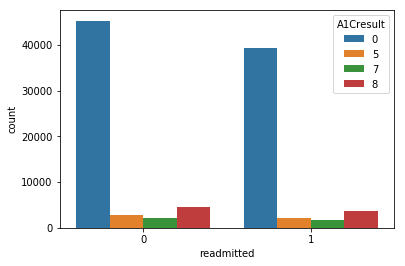

In [33]:
ax = sns.countplot(x = "readmitted", hue = 'A1Cresult', data = diabetes_df)

In [34]:
diabetes_df.loc[:, 'readmitted'].value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

101766 total patients

In [35]:
readmitted_patients = diabetes_df.loc[diabetes_df.loc[:, 'readmitted'] == 1, :]

In [36]:
readmitted_patients.loc[:, 'A1Cresult'].value_counts()

0    39426
8     3712
5     2081
7     1683
Name: A1Cresult, dtype: int64

84.1% of readmitted patients had no A1c results. 15.9% did have results...of that 7.9% at 8, 3.6% at 7 and 4.4% at 5

In [37]:
high_A1Cresult = diabetes_df.loc[diabetes_df.loc[:, 'A1Cresult'] >= 7, :]

In [38]:
high_A1Cresult.loc[:, 'readmitted'].value_counts()

0    6633
1    5395
Name: readmitted, dtype: int64

12028 total patients with high A1C results...55.1% not readmitted, 44.9% readmitted

In [39]:
no_A1Cresult = diabetes_df.loc[diabetes_df.loc[:, 'A1Cresult'] == 0, :]

In [40]:
no_A1Cresult.loc[:, 'readmitted'].value_counts()

0    45322
1    39426
Name: readmitted, dtype: int64

84748 total patients without a HbA1C results...53.5% not readmitted, 46.5% readmitted,
this compared to the entire population 83.3% had no A1c testing

In [41]:
any_A1Cresult = diabetes_df.loc[diabetes_df.loc[:, 'A1Cresult'] != 0, :]

In [42]:
any_A1Cresult.loc[:, 'readmitted'].value_counts()

0    9542
1    7476
Name: readmitted, dtype: int64

17018 total...56.1% not readmitted, 43.9 readmitted

From here on out I am going to work to predict if a patient is likely to be re-admitted. I'll start with defining an output for binary classification

In [43]:
diabetes_df['classification'] = (diabetes_df.readmitted == 1)

In [44]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [45]:
print('%.3f'%calc_prevalence(diabetes_df['classification'].values))

0.461


That calcualtion for prevalence of 46.1% is spot on based on my previous calculations above

In [46]:
feature_cols = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses', 'A1Cresult']

Set my feature columns to only included what I felt to be relevent non-string data

In [47]:
diabetes_df_data = diabetes_df[feature_cols + ['classification']]

And then based on those feature columns I created a new Dataframe

# Sample: 
From here I am going to shuffle the data and train it based on 70% of the data, 15% for validation, 15% test. As you can see I split out the 30% of the test & validation data into 50/50

In [48]:
diabetes_df_data = diabetes_df_data.sample(n = len(diabetes_df), random_state = 42)
diabetes_df_data = diabetes_df_data.reset_index(drop = True)

In [49]:
#30% of the data for validation and test
diabetes_df_validation_test = diabetes_df_data.sample(frac=0.30,random_state=42)

In [50]:
#now I split validation and test in half
diabetes_df_test = diabetes_df_validation_test.sample(frac = 0.5, random_state = 42)
diabetes_df_validation = diabetes_df_validation_test.drop(diabetes_df_test.index) 

In [51]:
#rest of data is used as training data
diabetes_df_train_all = diabetes_df_data.drop(diabetes_df_validation_test.index)

# Modeling

In [52]:
X_train = diabetes_df_train_all[feature_cols].values
X_valid = diabetes_df_validation[feature_cols].values

y_train = diabetes_df_train_all['classification'].values
y_valid = diabetes_df_validation['classification'].values

X_test = diabetes_df_test[feature_cols].values
y_test = diabetes_df_test['classification'].values

print('Training:',X_train.shape, y_train.shape)
print('Validation:',X_valid.shape, y_valid.shape)
print('Test:',X_test.shape, y_test.shape)

Training: (71236, 9) (71236,)
Validation: (15265, 9) (15265,)
Test: (15265, 9) (15265,)


In [53]:
thresh = 0.5

In [54]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_train_preds = lr.predict_proba(X_train)[:,1]
y_valid_preds = lr.predict_proba(X_valid)[:,1]
y_test_preds = lr.predict_proba(X_test)[:,1]

print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.648
accuracy:0.615
recall:0.387
precision:0.636
specificity:0.810
prevalence:0.461
 
Validation:
AUC:0.654
accuracy:0.622
recall:0.397
precision:0.651
specificity:0.817
prevalence:0.463
 
Test:
AUC:0.644
accuracy:0.616
recall:0.381
precision:0.635
specificity:0.815
prevalence:0.458
 


With our binary classifier we were able to predict the probability of a patient with diabetes to be readmitted. On our test data we had a AUC of 0.64 and using this model we were able catch 38% of the patient readmissions.

In [57]:
feature_importances = pd.DataFrame(lr.coef_[0], index = feature_cols, columns=['importance']).sort_values('importance', ascending=False)

In [58]:
feature_importances.head(9)

,importance
number_inpatient,0.360558
number_emergency,0.234500
number_outpatient,0.090020
number_diagnoses,0.086960
time_in_hospital,0.009198
num_medications,0.004230
num_lab_procedures,0.001722
A1Cresult,-0.001658
num_procedures,-0.055692


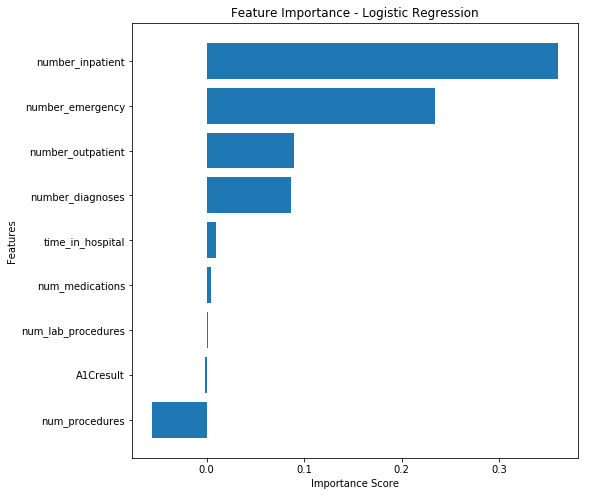

In [59]:
num = 9
ylocs = np.arange(num)
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num = None, figsize = (8, 8));
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

Oddly enough it appears that A1Cresults has a negative coefficient for predicting readmission, while the number of inpatient admission in the year prior has the highest positive coefficient